## VDM

In [22]:
import numpy as np
import pandas as pd

# Your data and test point
data = {
    'Color': ['White', 'Red', 'Black', 'Red', 'Red', 'White'],
    'HWY MPG': [23, 28, 32, 42, 40, 20],
    'Car Type': ['Van', 'Sport', 'Sport', 'Sedan', 'Sedan', 'Van']
}
df = pd.DataFrame(data)
test_point = {'Color': 'Red', 'HWY MPG': 28}

# Your VDM function
def vdm(val_i, val_j, attribute, df):
    classes = df['Car Type'].unique()
    vdm_sum = 0
    for c in classes:
        p_c_val_i = len(df[(df[attribute] == val_i) & (df['Car Type'] == c)]) / len(df[df[attribute] == val_i])
        p_c_val_j = len(df[(df[attribute] == val_j) & (df['Car Type'] == c)]) / len(df[df[attribute] == val_j])
        vdm_sum += (p_c_val_i - p_c_val_j) ** 2
    return vdm_sum

# Calculate Euclidean distance for 'HWY MPG'
df['Euclidean Distance'] = np.sqrt((df['HWY MPG'] - test_point['HWY MPG'])**2)

# Calculate VDM for 'Color'
df['VDM'] = df['Color'].apply(lambda x: vdm(x, test_point['Color'], 'Color', df))

# Calculate the final distance
df['Final Distance'] = np.sqrt(df['Euclidean Distance'] ** 2 + df['VDM'])

print(df)

   Color  HWY MPG Car Type  Euclidean Distance       VDM  Final Distance
0  White       23      Van                 5.0  1.555556        5.153208
1    Red       28    Sport                 0.0  0.000000        0.000000
2  Black       32    Sport                 4.0  0.888889        4.109609
3    Red       42    Sedan                14.0  0.000000       14.000000
4    Red       40    Sedan                12.0  0.000000       12.000000
5  White       20      Van                 8.0  1.555556        8.096639


In [23]:
# Calculate VDM for 'Colors' and represent it as a table
colors = df['Color'].unique()
vdm_table = pd.DataFrame(index=colors, columns=colors)
for i in colors:
    for j in colors:
        vdm_table.loc[i, j] = vdm(i, j, 'Color', df)
print(vdm_table)


          White       Red     Black
White       0.0  1.555556       2.0
Red    1.555556       0.0  0.888889
Black       2.0  0.888889       0.0


In [24]:
# Assume your friend tells you that
# she bought a red car with MPG of
# 28. Predict her car type using 3-NN
# algorithm.


# Sort the dataframe by the final distance in ascending order
df = df.sort_values('Final Distance')

# Get the top 3 nearest neighbors
nearest_neighbors = df.head(3)

# Predict the car type based on the majority car type among the nearest neighbors
predicted_car_type = nearest_neighbors['Car Type'].mode()[0]

print(f"Predicted car type for the test point: {predicted_car_type}")


Predicted car type for the test point: Sport


In [25]:
# Sort the dataframe by the final distance in ascending order
df = df.sort_values('Final Distance')

# Get the top 3 nearest neighbors
nearest_neighbors = df.head(3)

# Predict the car type based on the majority car type among the nearest neighbors
predicted_car_type = nearest_neighbors['Car Type'].mode()[0]

print(f"Predicted car type: {predicted_car_type}")
# Sort the dataframe by the final distance in ascending order
df_color = df.sort_values('VDM')

# Get the top 3 nearest neighbors based on color
nearest_neighbors_color = df_color.head(3)

# Predict the car type based on the majority car type among the nearest neighbors
predicted_car_type_color = nearest_neighbors_color['Car Type'].mode()[0]

print(f"Predicted car type using only color: {predicted_car_type_color}")


Predicted car type: Sport
Predicted car type using only color: Sedan


In [26]:
# Assume your friend tells you that
# she bought a car with MPG of 28. Predict her car type using 3-NN algorithm.

# Calculate Euclidean distance for 'HWY MPG'
df['Euclidean Distance'] = np.sqrt((df['HWY MPG'] - test_point['HWY MPG'])**2)

# Sort the dataframe by the final distance in ascending order
df = df.sort_values('Euclidean Distance')

# Get the top 3 nearest neighbors
nearest_neighbors = df.head(3)

# Predict the car type based on the majority car type among the nearest neighbors
predicted_car_type = nearest_neighbors['Car Type'].mode()[0]

print(f"Predicted car type: {predicted_car_type}")


Predicted car type: Sport


## Normalization methods:

In [34]:
# Using min max and standardization example
# Your data and test point
data = {
    'Color': ['White', 'Red', 'Black', 'Red', 'Red', 'White'],
    'HWY MPG': [23, 28, 32, 42, 40, 20],
    'Car Type': ['Van', 'Sport', 'Sport', 'Sedan', 'Sedan', 'Van']
}
df = pd.DataFrame(data)
test_point = {'Color': 'Red', 'HWY MPG': 28}

# Min-max scaling or Linear
df['HWY MPG Min-Max'] = (df['HWY MPG'] - df['HWY MPG'].min()) / (df['HWY MPG'].max() - df['HWY MPG'].min())

# Standardization or Gaussian
df['HWY MPG Standardization'] = (df['HWY MPG'] - df['HWY MPG'].mean()) / df['HWY MPG'].std()

## KNN classification

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Your data
# use built-in iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Input a test point to predict class
test_point = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict the class of the test point
predicted_class = knn.predict(test_point)

print(f"Predicted class: {iris.target_names[predicted_class][0]}")


Accuracy: 1.00
Predicted class: setosa


## Norms:

In [28]:
# I want to calculate norms based on iris dataset, l1 l2 and l_inf
# Your data
# use built-in iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data


# Calculate L1 norm
l1_norm = np.linalg.norm(X, ord=1, axis=1)

# Calculate L2 norm
l2_norm = np.linalg.norm(X, ord=2, axis=1)

# Calculate L_inf norm
l_inf_norm = np.linalg.norm(X, ord=np.inf, axis=1)

# Create a dataframe to display the results
df = pd.DataFrame({'L1 Norm': l1_norm, 'L2 Norm': l2_norm, 'L_inf Norm': l_inf_norm})
print(df.head())
df.shape

   L1 Norm   L2 Norm  L_inf Norm
0     10.2  6.345077         5.1
1      9.5  5.916925         4.9
2      9.4  5.836095         4.7
3      9.4  5.749783         4.6
4     10.2  6.321392         5.0


(150, 3)

## KNN regression

In [29]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
# X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
# X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# Create a KNN regressor with 3 neighbors
knn = KNeighborsRegressor(n_neighbors=3)

# Train the regressor
knn.fit(X_train, y_train)

# Test the regressor
y_pred = knn.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

# Input a test point to predict the target
# This is a random test point. Replace it with a valid test point from your context.
test_point = np.array([[0.03807591, 0.05068012, 0.06169621, 0.02187235, -0.0442235,
                        -0.03482076, -0.04340085, -0.00259226, 0.0199071, -0.01764613]])

# Predict the target of the test point
predicted_target = knn.predict(test_point)

print(f"Predicted target: {predicted_target[0]:.2f}")

Mean Squared Error: 3364.39
Predicted target: 164.33


## Weighted knn

In [30]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

data = pd.read_csv('knnData.csv')

# If you want to use train_test_split on the question's data
# X = df['feature1', 'feature2]
# y = df['target variable']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_x = np.array(data[['trainPoints_x1', 'trainPoints_x2']])
train_y = np.array(data[['trainLabel']])
test_x = np.array(data[['testPoints_x1', 'testPoints_x2']])
test_y = np.array(data[['testLabel']])

def myKnn(xTrain, yTrain, xTest, yTest, distMetric):
    distArray = cdist(xTest, xTrain, distMetric) # The first row contains the distances of the first test from every train point
    w = 1/(np.sort(distArray, axis = 1)**2)
    idx = np.argsort(distArray, axis = 1)
    nearTrain_y=train_y[idx[:,0:3]].reshape((40,3)) # output of the nearest 3 neighbors
    pred = np.where(np.multiply(w[:,0:3],nearTrain_y).sum(axis = 1) < 0,  -1, 1)
    pred = pred.reshape(40,1)
    print('Accuracy for %s norm is' % distMetric, (pred == test_y).sum()/len(test_y)*100)


myMetrics = ['cityblock','euclidean','chebyshev'] # L1, L2, L_inf respectively
results = [myKnn(train_x, train_y, test_x, test_y, i) for i in myMetrics]

Accuracy for cityblock norm is 87.5
Accuracy for euclidean norm is 82.5
Accuracy for chebyshev norm is 87.5


## Gaussian radial distance:

In [31]:
def gaussian_rbf(x, c, gamma):
    return np.exp(-np.linalg.norm(x - c)**2 / r)

# Example usage with sample vectors:
# Define vectors x and c
x_vector = np.array([1, 2])
c_vector = np.array([3, 4])

# Gamma value
r = 0.05

# Calculate the Gaussian RBF kernel with the sample vectors
result = gaussian_rbf(x_vector, c_vector, r)
result

3.2574885322074285e-70

## Logistic Regression


In [32]:
# Use built in dataset to perform logistic regression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)

# Test the classifier
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Input a test point to predict class
test_point = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict the class of the test point
predicted_class = log_reg.predict(test_point)

print(f"Predicted class: {iris.target_names[predicted_class][0]}")


Accuracy: 1.00
Predicted class: setosa


c:\Users\kusha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# How to get gradient descent and cost function and weights for the above logistic regression example
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to the X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize the weights
weights = np.zeros(X_train.shape[1])

# Set the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    # Calculate the predicted probabilities
    z = np.dot(X_train, weights)
    predicted_probabilities = 1 / (1 + np.exp(-z))

    # Calculate the gradient
    gradient = np.dot(X_train.T, (predicted_probabilities - y_train)) / y_train.size

    # Update the weights
    weights -= learning_rate * gradient

# Calculate the predicted probabilities for the test set
z = np.dot(X_test, weights)
predicted_probabilities = 1 / (1 + np.exp(-z))

# Convert the predicted probabilities to class labels
predicted_class = (predicted_probabilities >= 0.5).astype(int)

# Calculate the accuracy
# Reshape or transpose the arrays to ensure compatibility
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(gradient) 
print(weights)

[-0.33653443 -0.27662725  0.08593618 -0.33145513 -0.35223917]
[ 3.61351366  2.99075058 -1.22373305  3.69013403  3.86761184]


## Kmeans example - finding centroid
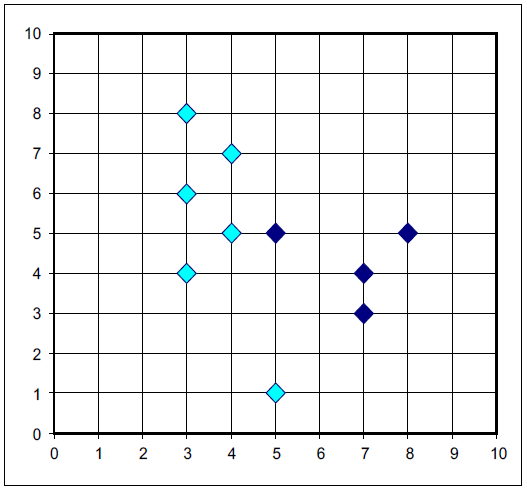

In [2]:
import numpy as np

In [3]:
# x1,y1 -> class 1 (purple)
# x2,y2 -> class 2 (yellow)

# Finding centroids
x1 = [3, 3, 4]
y1 = [7, 6, 6]

x2 = [5, 7, 7, 9]
y2 = [6, 4, 4, 3]

x1_centroid = np.mean(x1)
y1_centroid = np.mean(y1)

x2_centroid = np.mean(x2)
y2_centroid = np.mean(y2)


In [5]:
print(x1_centroid, y1_centroid) # purple
print(x2_centroid, y2_centroid) # yellow

round(x1_centroid, 2), round(y1_centroid, 2), round(x2_centroid, 2), round(y2_centroid, 2)

3.3333333333333335 6.333333333333333
7.0 4.25


(3.33, 6.33, 7.0, 4.25)

## RBF with k centers:

In [44]:
df = pd.read_csv("rbfClassification.csv")
df.head()

,x1,x2,cls
0,-2.427236,1.965984,1
1,2.382605,2.256614,0
2,-2.680668,2.379979,1
3,-2.620277,2.913823,0
4,1.513792,-2.312650,0


In [45]:
from sklearn.cluster import KMeans

# Assuming you have a dataframe called 'df' with the data
# Select the features you want to use for clustering
features = ['x1', 'x2']

# Create an instance of KMeans with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the data to the KMeans model
kmeans.fit(df[features])

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the coordinates of the cluster centers
for center in cluster_centers:
    print(f"Cluster center: {center}")


c:\Users\kusha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster center: [-2.26014807  2.1265868 ]
Cluster center: [ 1.30641042 -0.37348593]


In [46]:
from numpy.linalg import pinv
import numpy as np

def design_matrix(X, mus, gamma):
    # Construct the design matrix for RBF
    N = X.shape[0]  # Number of data points
    K = len(mus)    # Number of centers
    Φ = np.zeros((N, K))
    for i in range(N):
        for k in range(K):
            Φ[i, k] = np.exp(-gamma * np.linalg.norm(X[i] - mus[k])**2)
    return Φ

# Your input data points
X = df[features].values

# Your target outputs
# Replace 'target' with the name of your target column
Y = df['cls'].values

# Your chosen RBF centers are the cluster centers from KMeans
mus = kmeans.cluster_centers_

# Your chosen gamma value
gamma = 0.5

# Calculate the design matrix
Φ = design_matrix(X, mus, gamma)

# Calculate the weights using the pseudo-inverse
weights = pinv(Φ).dot(Y)

print(weights)

# Report the classification rate of the model
# Your input data points
X = df[features].values

# Your target outputs
# Replace 'target' with the name of your target column
Y = df['cls'].values

# Calculate the design matrix
Φ = design_matrix(X, mus, gamma)

# Calculate the predicted outputs
Y_pred = Φ.dot(weights)

# Calculate the classification rate
classification_rate = np.mean(np.round(Y_pred) == Y)

print(f"Classification rate: {classification_rate:.2f}")

[1.15858194 0.21915424]
Classification rate: 0.75


In [ ]:
print(Φ.shape)
print(weights.shape)
print(Y_pred.shape)